In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Cargo el conjunto de datos Iris desde la biblioteca seaborn
iris = sns.load_dataset("iris")

In [4]:
# Mostrar las primeras 10 filas del conjunto de datos
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [5]:
# Filas, comlumnas --> 152, 5
iris.shape

(150, 5)

In [6]:
# Obtener los nombres de las columnas como una lista
column_names = iris.columns.tolist()
column_names

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [7]:
# Estadísticas descriptivas por especie
des = iris.describe()

In [8]:
# Cuento la cantidad de valores NaN en el DataFrame
des.loc['Nan'] = iris.isna().sum()
nan_count = des.loc['Nan']

In [9]:
# Calcular el porcentaje de valores NaN en el DataFrame
des.loc['%Nan'] = (nan_count/ len(iris)) * 100
des

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000
Nan,0.000000,0.000000,0.000000,0.000000
%Nan,0.000000,0.000000,0.000000,0.000000


In [10]:
# Agrupo los datos por especie y calculo estadísticas descriptivas para cada grupo
species_stats = iris.groupby("species").describe()
species_stats

sepal_length                                              \
                  count   mean       std  min    25%  50%  75%  max   
species                                                               
setosa             50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
versicolor         50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
virginica          50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

           sepal_width         ... petal_length      petal_width         \
                 count   mean  ...          75%  max       count   mean   
species                        ...                                        
setosa            50.0  3.428  ...        1.575  1.9        50.0  0.246   
versicolor        50.0  2.770  ...        4.600  5.1        50.0  1.326   
virginica         50.0  2.974  ...        5.875  6.9        50.0  2.026   

                                               
                 std  min  25%  50%  75%  max  
species                                        
setosa      0.105386  0.1  0.2  0.2  0.3  0.6  
versicolor  0.197753  1.0  1.2  1.3  1.5  1.8  
virginica   0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

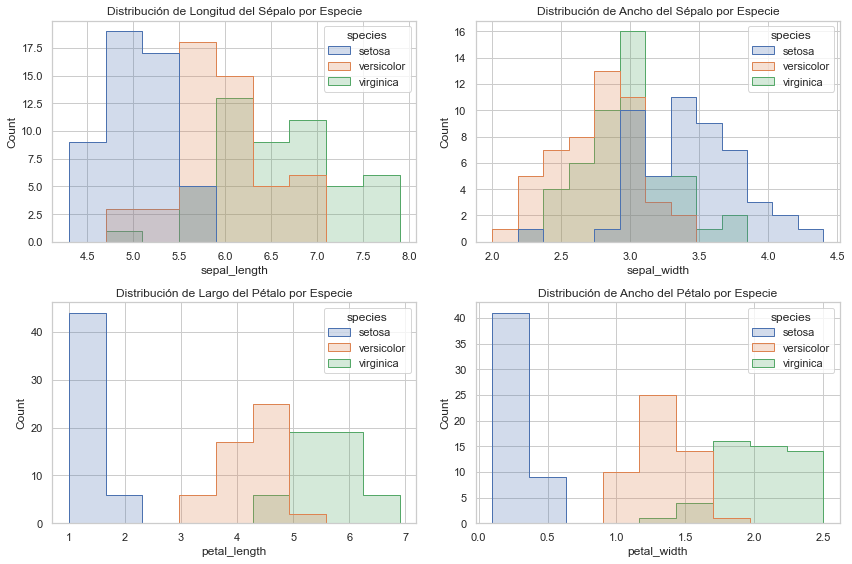

In [15]:
# Creo histogramas para cada característica por especie
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

# Longitud del sépalo
plt.subplot(2,2,1)
sns.histplot(data=iris, x="sepal_length", hue="species", element="step", common_norm=True)
plt.title("Distribución de Longitud del Sépalo por Especie")

# Ancho del sépalo
plt.subplot(2,2,2)
sns.histplot(data=iris, x="sepal_width", hue="species", element="step", common_norm=True)
plt.title("Distribución de Ancho del Sépalo por Especie")

# Longitud del pétalo
plt.subplot(2,2,3)
sns.histplot(data=iris, x="petal_length", hue="species", element="step", common_norm=True)
plt.title("Distribución de Largo del Pétalo por Especie")

# Ancho del pétalo
plt.subplot(2,2,4)
sns.histplot(data=iris, x="petal_width", hue="species", element="step", common_norm=True)
plt.title("Distribución de Ancho del Pétalo por Especie")

# Ajustar automáticamente los márgenes y los espacios entre subtramas
plt.tight_layout()

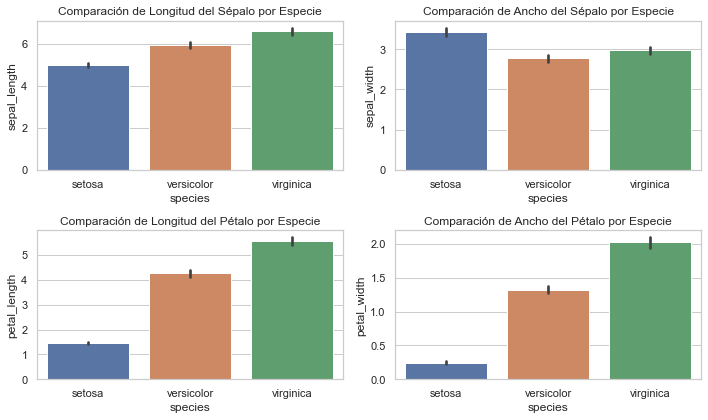

In [13]:
# Creo gráficos de barras para comparar características entre especies
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Longitud del sépalo
plt.subplot(2, 2, 1)
sns.barplot(data=iris, x="species", y="sepal_length")
plt.title("Comparación de Longitud del Sépalo por Especie")

# Ancho del sépalo
plt.subplot(2, 2, 2)
sns.barplot(data=iris, x="species", y="sepal_width")
plt.title("Comparación de Ancho del Sépalo por Especie")

# Longitud del pétalo
plt.subplot(2, 2, 3)
sns.barplot(data=iris, x="species", y="petal_length")
plt.title("Comparación de Longitud del Pétalo por Especie")

# Ancho del pétalo
plt.subplot(2, 2, 4)
sns.barplot(data=iris, x="species", y="petal_width")
plt.title("Comparación de Ancho del Pétalo por Especie")

plt.tight_layout()

<AxesSubplot:>

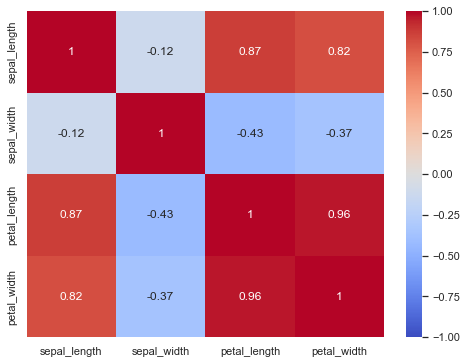

In [14]:
# Crear un mapa de calor para visualizar la matriz de correlación
sns.set(style="white")
plt.figure(figsize=(8, 6))
sns.heatmap(iris.corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1)

In [23]:
# Agrupo los datos por especie y calculo promedios, medianas y desviasión estándard.
grouped = iris.groupby("species")[["sepal_length", "sepal_width", "petal_length", "petal_width"]].agg(["mean", "median", "std"])
grouped

sepal_length                  sepal_width                   \
                   mean median       std        mean median       std   
species                                                                 
setosa            5.006    5.0  0.352490       3.428    3.4  0.379064   
versicolor        5.936    5.9  0.516171       2.770    2.8  0.313798   
virginica         6.588    6.5  0.635880       2.974    3.0  0.322497   

           petal_length                  petal_width                   
                   mean median       std        mean median       std  
species                                                                
setosa            1.462   1.50  0.173664       0.246    0.2  0.105386  
versicolor        4.260   4.35  0.469911       1.326    1.3  0.197753  
virginica         5.552   5.55  0.551895       2.026    2.0  0.274650

Text(0, 0.5, 'Longitud del Sépalo')

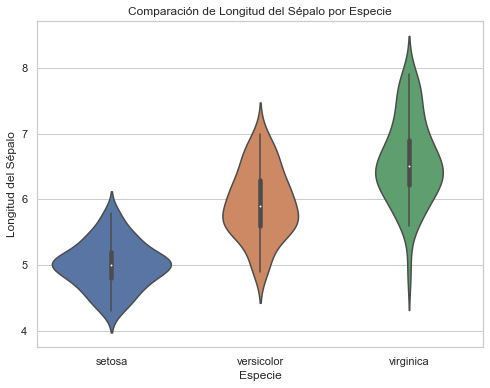

In [24]:
# Crear gráfico de violín para comparar las longitudes del sépalo por especie
plt.figure(figsize=(8, 6))
sns.violinplot(data=iris, x="species", y="sepal_length")
plt.title("Comparación de Longitud del Sépalo por Especie")
plt.xlabel("Especie")
plt.ylabel("Longitud del Sépalo")

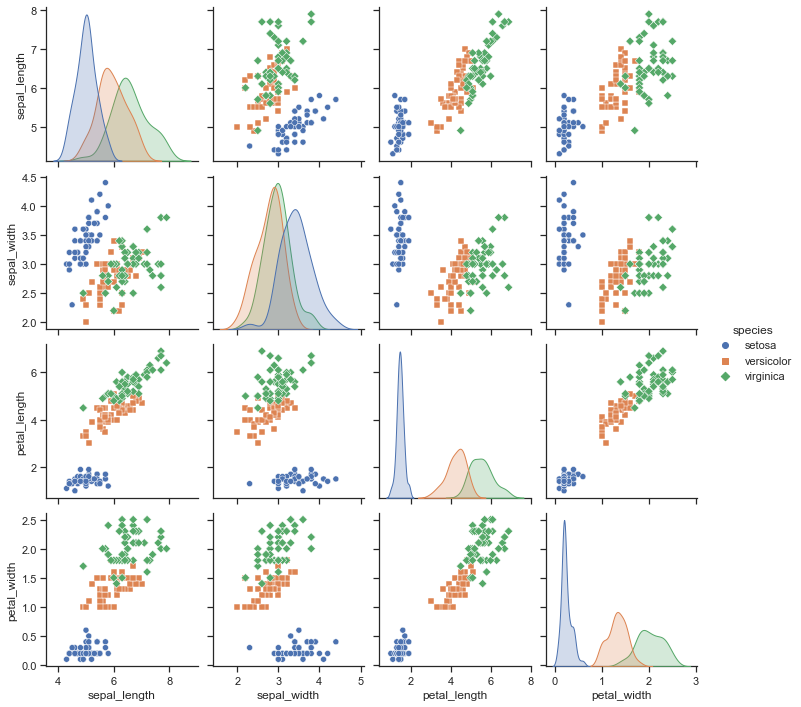

In [30]:
# Creo diagramas de dispersión por pares de características
sns.set(style="ticks")
sns.pairplot(iris, hue="species", markers=["o", "s", "D"])